In [11]:
# Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.pipeline import Pipeline

In [12]:
# Load Dataset
df = pd.read_csv("dataset/heart_dataset.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

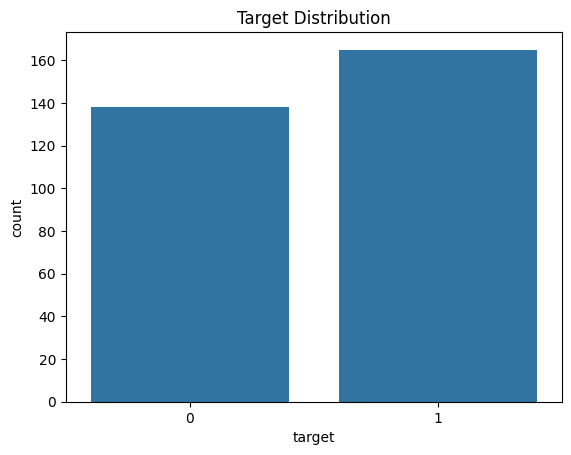

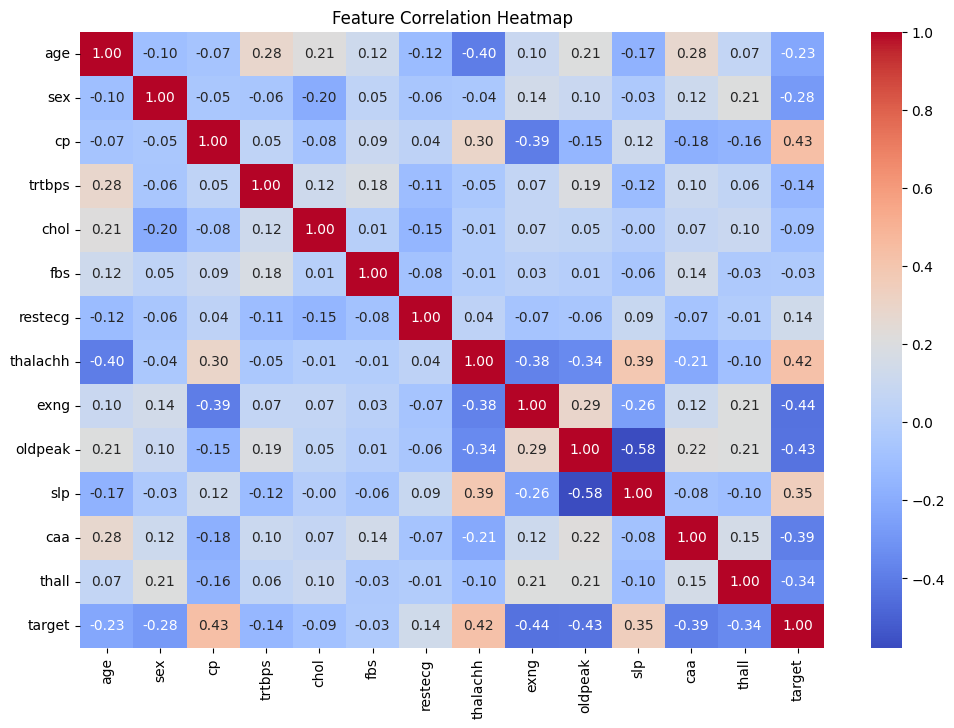

In [13]:
# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualize distribution of target
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

In [5]:
# Split dataset into train, validation, test
x_train, x_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [6]:
# Build Pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

In [14]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['rbf', 'linear'],
    'svc__gamma': ['scale', 'auto']
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Hyperparameters:", grid.best_params_)

Best Hyperparameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


Train Accuracy: 0.882
Validation Accuracy: 0.800
Test Accuracy: 0.739
Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.72      0.84      0.78        25

    accuracy                           0.74        46
   macro avg       0.74      0.73      0.73        46
weighted avg       0.74      0.74      0.74        46



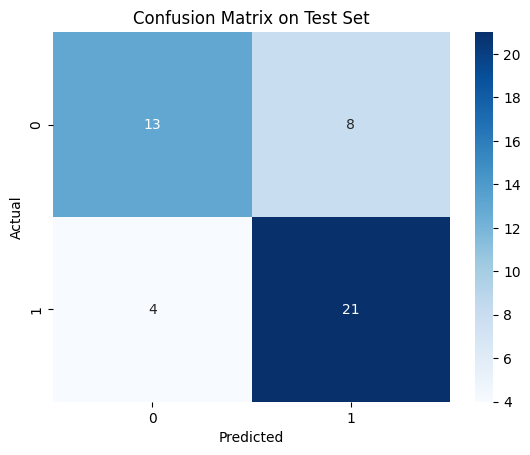

In [8]:
# Evaluate model on train, validation, test
best_model = grid.best_estimator_

y_train_pred = best_model.predict(x_train)
y_val_pred = best_model.predict(x_val)
y_test_pred = best_model.predict(x_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")

# Classification report
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.show()

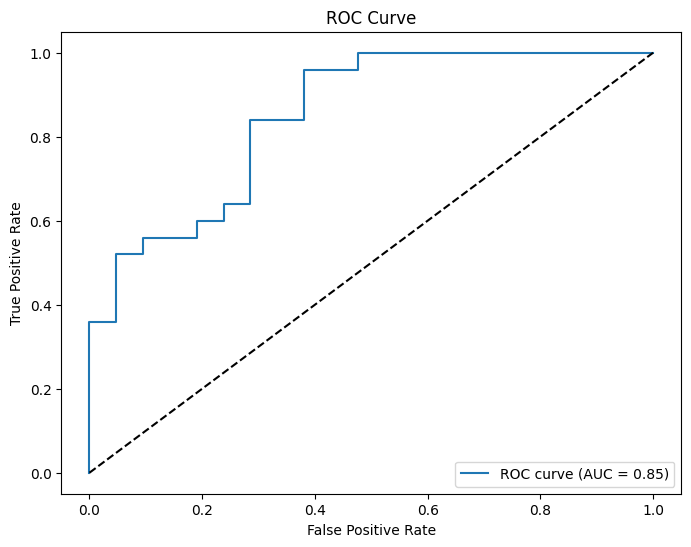

In [9]:
# ROC Curve
y_test_prob = best_model.decision_function(x_test)  # for SVM
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

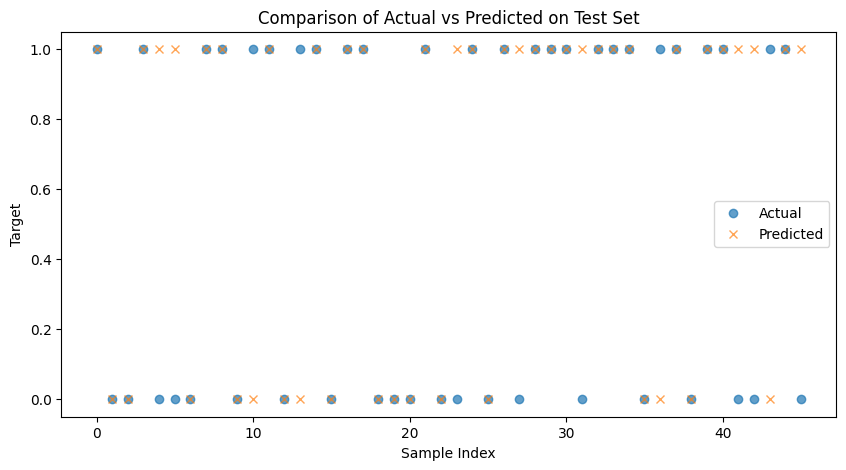

In [10]:
# Comparison of Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, 'o', label='Actual', alpha=0.7)
plt.plot(range(len(y_test)), y_test_pred, 'x', label='Predicted', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.title('Comparison of Actual vs Predicted on Test Set')
plt.legend()
plt.show()